In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/interbank20/sample_submission.csv
/kaggle/input/interbank20/y_train.csv
/kaggle/input/interbank20/sunat_test.csv
/kaggle/input/interbank20/rcc_test.csv
/kaggle/input/interbank20/se_test.csv
/kaggle/input/interbank20/sunat_train.csv
/kaggle/input/interbank20/se_train.csv
/kaggle/input/interbank20/censo_test.csv
/kaggle/input/interbank20/productos.csv
/kaggle/input/interbank20/censo_train.csv
/kaggle/input/interbank20/rcc_train.csv


## Load RCC

In [2]:
rcc_train = pd.read_csv('/kaggle/input/interbank20/rcc_train.csv')
rcc_test = pd.read_csv('/kaggle/input/interbank20/rcc_test.csv')
y_train = pd.read_csv('/kaggle/input/interbank20/y_train.csv', index_col='key_value')

In [3]:
bins = [-1, 0, 10, 20, 30, 60, 90, 180, 360, 720, float("inf")]
rcc_train["condicion"] = pd.cut(rcc_train.condicion, bins, labels = range(0,10)).astype('int32')
rcc_test["condicion"] = pd.cut(rcc_test.condicion, bins, labels = range(0,10)).astype('int32')
rcc_test['cod_instit_financiera'].fillna(rcc_test['cod_instit_financiera'].value_counts().index[0], inplace=True)
rcc_test['PRODUCTO'].fillna(rcc_test['PRODUCTO'].value_counts().index[0], inplace=True)

In [4]:
dict_ = dict(zip(list(rcc_train.dtypes[rcc_train.dtypes == int].index), ['int32']*len(rcc_train.dtypes[rcc_train.dtypes == int].index)))
rcc_train = rcc_train.astype(dict_)
rcc_test = rcc_test.astype(dict_)

In [5]:
import statistics as stat
import numpy as np
def calculate_mode(x):
    try:
        moda=stat.mode(x)
    except:
        moda=np.nan
    return moda

In [6]:
from tqdm.notebook import tqdm 
import gc
list_rcc_train_agg = []

moda=lambda x: calculate_mode(x)
moda.__name__='mode'
agg_rcc = {'condicion':['max'],
           'saldo':['max'],
           'cod_instit_financiera':['nunique',moda],
           'PRODUCTO':['nunique',moda],
           'COD_CLASIFICACION_DEUDOR':['nunique','max','min','sum',moda]
          }

In [7]:
for n,i in enumerate(tqdm(sorted(set(rcc_train.codmes),reverse=True))):
#     if i in [201802,201712,201709,201703]:
    if n in [0,1,2,3,4,5,11]:
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR']:
            print(f'haciendo {c}')
            rcc_train_agg = rcc_train[rcc_train.codmes>=i].groupby(['key_value', c]).saldo.sum().unstack(level = 1, fill_value=0)
            rcc_train_agg.columns = [f'{rcc_train_agg.columns.name}_{c}_saldo_ult{n+1}meses' for c in rcc_train_agg.columns]
            list_rcc_train_agg.append(rcc_train_agg)
            gc.collect()
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR']:
            print(f'haciendo {c}')
            rcc_train_agg = rcc_train[rcc_train.codmes>=i].groupby(['key_value', c]).condicion.max().unstack(level = 1, fill_value=0)
            rcc_train_agg.columns = [f'{rcc_train_agg.columns.name}_{c}_condicion_ult{n+1}meses' for c in rcc_train_agg.columns]
            list_rcc_train_agg.append(rcc_train_agg)
            gc.collect()

        print(f'haciendo agg ')
        rcc_train_agg = rcc_train[rcc_train.codmes>=i].groupby('key_value').agg(agg_rcc)
        rcc_train_agg.columns = [i+'_'+j+f'_ult{n+1}mes' for i,j in rcc_train_agg.columns]
        list_rcc_train_agg.append(rcc_train_agg)
        gc.collect()
        
rcc_train_ = pd.concat(list_rcc_train_agg, axis=1)
del rcc_train, list_rcc_train_agg

haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg 
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg 
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg 
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg 
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg 
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haci

In [8]:
from tqdm.notebook import tqdm 
list_rcc_test_agg = []
for n,i in enumerate(tqdm(sorted(set(rcc_test.codmes),reverse=True))):
#     if i in [201902,201812,201809,201803]:
    if n in [0,1,2,3,4,5,11]:
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR']:
            print(f'haciendo {c}')
            rcc_test_agg = rcc_test[rcc_test.codmes>=i].groupby(['key_value', c]).saldo.sum().unstack(level = 1, fill_value=0)
            rcc_test_agg.columns = [f'{rcc_test_agg.columns.name}_{c}_saldo_ult{n+1}meses' for c in rcc_test_agg.columns]
            list_rcc_test_agg.append(rcc_test_agg)
            gc.collect()
        for c in ['tipo_credito','RIESGO_DIRECTO','COD_CLASIFICACION_DEUDOR']:
            print(f'haciendo {c}')
            rcc_test_agg = rcc_test[rcc_test.codmes>=i].groupby(['key_value', c]).condicion.max().unstack(level = 1, fill_value=0)
            rcc_test_agg.columns = [f'{rcc_test_agg.columns.name}_{c}_condicion_ult{n+1}meses' for c in rcc_test_agg.columns]
            list_rcc_test_agg.append(rcc_test_agg)
            gc.collect()
        print(f'haciendo agg')    
        rcc_test_agg = rcc_test[rcc_test.codmes>=i].groupby('key_value').agg(agg_rcc)
        rcc_test_agg.columns = [i+'_'+j+f'_ult{n+1}mes' for i,j in rcc_test_agg.columns]
        list_rcc_test_agg.append(rcc_test_agg)
        gc.collect()

rcc_test_ = pd.concat(list_rcc_test_agg, axis=1)
del rcc_test, list_rcc_test_agg

haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo agg
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo COD_CLASIFICACION_DEUDOR
haciendo tipo_credito
haciendo RIESGO_DIRECTO
haciendo 

In [9]:
print(rcc_train_.shape, rcc_test_.shape)
keep_columns = list(set(rcc_train_.columns).intersection(rcc_test_.columns))
rcc_train_ = rcc_train_[keep_columns].copy()
rcc_test_ = rcc_test_[keep_columns].copy()
print(rcc_train_.shape, rcc_test_.shape)

(358487, 343) (396666, 357)
(358487, 343) (396666, 343)


In [10]:
train = rcc_train_.copy()
test = rcc_test_.copy()
del rcc_train_, rcc_test_

In [11]:
### imputar datos categoricos
var_categ = [i for i in train.columns if 'mode' in i]
for i in var_categ:
    train[i] = train[i].fillna(train[i].value_counts().index[0])
    test[i] = test[i].fillna(train[i].value_counts().index[0])

In [12]:
### mean encoding
### ojo, en el test hay missing values pero pocos
train = pd.concat([train, y_train], axis=1)
for i in var_categ:
    me = train.groupby([i])['target'].mean().to_dict() 
    train[f'{i}_me'] =  train[i].map(me) 
    test[f'{i}_me'] =  test[i].map(me)
    ### imputar datos faltantes
    test[f'{i}_me'] =  test[f'{i}_me'].fillna(train[f'{i}_me'].median())
    
train.drop('target', axis=1, inplace=True)
train.drop(var_categ, axis=1, inplace=True)
test.drop(var_categ, axis=1, inplace=True)

## Load SE

In [13]:
se_train = pd.read_csv('/kaggle/input/interbank20/se_train.csv', index_col='key_value')
se_test = pd.read_csv('/kaggle/input/interbank20/se_test.csv', index_col='key_value')
# edad y cod_ubi tienen valores nulos con cerca de 1% cada uno

In [14]:
dict_ = {'sexo':'int32',
 'est_cvl':'int32',
 'sit_lab':'int32',
 'cod_ocu':'int32',
 'ctd_hijos':'int32',
 'flg_sin_email':'int32',
 'ctd_veh':'int32',
 'lgr_vot':'int32',
 'prv':'int32',
 'dto':'int32',
 'rgn':'int32',
 'tip_lvledu':'int32'}
se_train = se_train.astype(dict_)
se_test = se_test.astype(dict_)

In [15]:
### imputar datos faltantes en la base se_[train/test]
se_train['edad'].fillna(se_train['edad'].median(), inplace=True)
se_test['edad'].fillna(se_train['edad'].median(), inplace=True)
se_train['cod_ubi'].fillna(se_train['cod_ubi'].median(), inplace=True)
se_test['cod_ubi'].fillna(se_train['cod_ubi'].median(), inplace=True)

In [16]:
var_categ=['sit_lab','lgr_vot','sexo','rgn','tip_lvledu','flg_sin_email','prv','est_cvl','cod_ocu','dto']
# var_caunti=['edad','ctd_hijos','ctd_veh','cod_ubi']
se_train['target'] = y_train.loc[se_train.index]
for i in var_categ:
    me = se_train.groupby([i])['target'].mean().to_dict() 
    se_train[f'{i}_me'] =  se_train[i].map(me) 
    se_test[f'{i}_me'] =  se_test[i].map(me)
    ### imputar datos faltantes
    se_test[f'{i}_me'] =  se_test[f'{i}_me'].fillna(se_train[f'{i}_me'].median())
se_train.drop('target', axis=1, inplace=True)
se_train.drop(var_categ, axis=1, inplace=True)
se_test.drop(var_categ, axis=1, inplace=True)

In [17]:
train = train.join(se_train) ### Ojo 57 valores perdidos
test = test.join(se_test)
del se_train, se_test

In [18]:
### imputar valores faltantes
var_caunti = ['lgr_vot_me','sit_lab_me','cod_ubi','tip_lvledu_me','prv_me','rgn_me',
 'ctd_hijos','edad','cod_ocu_me','ctd_veh','est_cvl_me','dto_me','flg_sin_email_me','sexo_me']
for i in var_caunti:
    train[i] = train[i].fillna(train[i].median())
    test[i] = test[i].fillna(train[i].median())
gc.collect()

24

## Load Censo

In [19]:
# censo_train = pd.read_csv('/kaggle/input/interbank20/censo_train.csv', index_col='key_value')
# censo_test = pd.read_csv('/kaggle/input/interbank20/censo_test.csv', index_col='key_value')

In [20]:
# var_cuanti = ['lon_x', 'lat_y','score','pob','pob_a','pob_b','pob_c','pob_d','pob_e','dehogar2','dehogar3',
#               'dehogar4', 'dehogar5', 'dehogar6', 'dehogar7', 'dehogar8','tipviv1', 'tipviv3', 'tipviv4',
#               'tipviv6', 'tipviv7', 'tipviv9', 'matpar2', 'matpar3', 'matpar4', 'matpar5', 'matpar6', 'matpar7', 'matpar8',
#               'abaagu2', 'abaagu3', 'abaagu4', 'abaagu5', 'abaagu6', 'abaagu7', 'abaagu8', 'abaagu9',
#               'vivten1', 'vivten2', 'vivten4', 'vivten5', 
#               'mattec2', 'mattec3', 'mattec4', 'mattec5', 'mattec6', 'mattec7', 'mattec8',
#               'agudia2', 'agundia1', 'agundia2', 'agundia3', 'agundia4', 'agundia5', 'agundia6', 'pagaguno',
#               'pagagu2', 'pagagu3', 'pagagu5', 'hig3', 'hig4', 'hig5', 'hig6', 'hig7', 'hig8', 'alupuno',
#               'cocteno', 'refteno', 'celteno', 'motten', 'lanten', 'adumay', 'pafisis', 'pafue', 'paotr', 'lee_no', 
#               'estud_1', 'estud_5', 'estud_6', 'profe_1', 'profe_5', 'profe_6', 'profe_7', 'profe_8', 'profe_9','profe_10',
#               'acteco2', 'acteco3', 'acteco4', 'acteco5', 'acteco6', 'acteco9', 'acteco12', 'acteco14', 'acteco15', 'acteco18',
#               'acteco19', 'acteco20', 'acteco21','ocup_1', 'ocup_4', 'ocup_5']
# var_categ = ['zon_sis', 'zon_der', 'zon_inu','pred','flag_censo']
# censo_train = censo_train[var_cuanti+var_categ].copy()
# censo_test = censo_test[var_cuanti+var_categ].copy()

In [21]:
# train = train.join(censo_train)
# test = test.join(censo_test)
# del censo_train, censo_test

In [22]:
# for i in var_cuanti:
#     train[i] = train[i].fillna(train[i].median())
#     test[i] = test[i].fillna(train[i].median())
# for i in var_categ:
#     train[i] = train[i].fillna(train[i].value_counts().index[0])
#     test[i] = test[i].fillna(train[i].value_counts().index[0])

## Load Sunat

In [23]:
sunat_train = pd.read_csv('/kaggle/input/interbank20/sunat_train.csv')
sunat_test = pd.read_csv('/kaggle/input/interbank20/sunat_test.csv')

In [24]:
dict_ = dict(zip(list(sunat_train.dtypes[sunat_train.dtypes == int].index), ['int32']*len(sunat_train.dtypes[sunat_train.dtypes == int].index)))
sunat_train = sunat_train.astype(dict_)
sunat_test = sunat_test.astype(dict_)

In [25]:
import statistics as stat
import numpy as np
def calculate_mode(x):
    try:
        moda=stat.mode(x)
    except:
        moda=np.nan
    return moda
from tqdm.notebook import tqdm 
moda=lambda x: calculate_mode(x)
moda.__name__='mode'
agg_sunat = {'tipcontribuyente':['nunique',moda],
           'tippersona':['nunique',moda],
           'ciiu':['nunique', moda],
           'ubigeo':['nunique',moda],
           'condiciondomicilio':['nunique',moda],
           'estadocontribuyente':['nunique',moda],
           'codvia':['nunique',moda],
           'codzona':['nunique',moda],
           'contabilidad':['nunique',moda],
           'facturacion':['nunique',moda],
           'domiciliado':['nunique',moda],
           'comercioexterior':['nunique',moda],
           'cargorele':['nunique',moda],
           'codentidadtributo':['nunique',moda],
           'estadotributo':['nunique',moda],
           'fecalta':['sum', 'nunique'],
           'fecbaja':['sum', 'nunique'],
          }

In [26]:
sunat_train_ = sunat_train.groupby('key_value').agg(agg_sunat)
sunat_train_.columns = [i+'_'+j for i,j in sunat_train_.columns]
sunat_test_ = sunat_test.groupby('key_value').agg(agg_sunat)
sunat_test_.columns = [i+'_'+j for i,j in sunat_test_.columns]
del sunat_train, sunat_test

In [27]:
# var_categ = [i for i in sunat_train_.columns if 'mode' in i]
# for i in var_categ:
#     sunat_train_[i] = sunat_train_[i].fillna(sunat_train_[i].value_counts().index[0])
#     sunat_test_[i] = sunat_test_[i].fillna(sunat_train_[i].value_counts().index[0])

In [28]:
# sunat_train_['target'] = y_train.loc[sunat_train_.index]
# for i in var_categ:
#     me = sunat_train_.groupby([i])['target'].mean().to_dict() 
#     sunat_train_[f'{i}_me'] =  sunat_train_[i].map(me) 
#     sunat_test_[f'{i}_me'] =  sunat_test_[i].map(me)
#     ### imputar datos faltantes
#     sunat_test_[f'{i}_me'] =  sunat_test_[f'{i}_me'].fillna(sunat_train_[f'{i}_me'].median())
# sunat_train_.drop('target', axis=1, inplace=True)
# sunat_train_.drop(var_categ, axis=1, inplace=True)
# sunat_test_.drop(var_categ, axis=1, inplace=True)

In [29]:
train = train.join(sunat_train_)
test = test.join(sunat_test_)
train.shape, test.shape

((358487, 391), (396666, 391))

In [30]:
# var_cuanti = ['fecbaja_nunique', 'tipcontribuyente_mode_me', 'tippersona_mode_me', 'ciiu_mode_me',
# 'ubigeo_mode_me', 'condiciondomicilio_mode_me', 'estadocontribuyente_mode_me', 
# 'contabilidad_mode_me','codzona_mode_me', 'facturacion_mode_me', 'domiciliado_mode_me', 
# 'comercioexterior_mode_me', 'fecbaja_sum', 'cargorele_mode_me', 'codvia_mode_me', 
# 'fecalta_nunique', 'codvia_nunique', 'estadotributo_nunique', 'codentidadtributo_mode_me', 
# 'tipcontribuyente_nunique','tippersona_nunique', 'ciiu_nunique', 'ubigeo_nunique',
# 'condiciondomicilio_nunique','fecalta_sum', 'estadocontribuyente_nunique',
# 'contabilidad_nunique', 'facturacion_nunique','domiciliado_nunique', 'comercioexterior_nunique',
# 'cargorele_nunique', 'codentidadtributo_nunique', 'codzona_nunique', 'estadotributo_mode_me']
# for i in var_cuanti:
#     train[i] = train[i].fillna(train[i].median())
#     test[i] = test[i].fillna(train[i].median())

## Training

In [33]:
keep_columns = set(train.columns).intersection(test.columns)
train=train[keep_columns].copy()
test=test[keep_columns].copy()
train.shape, test.shape

((358487, 391), (396666, 391))

In [40]:
# !pip install catboost

from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
from tqdm.notebook import tqdm 
max_depths = [6,8,10,12,14]
roc_auc_estimados = []
roc_auc_varianzas = []
for max_depth in tqdm(max_depths):
    folds = [train.index[t] for t, v in KFold(5).split(train)]
    test_probs = []
    train_probs = []
    fi = []
    for i, idx in enumerate(folds):
        print("*"*10, i, "*"*10)
        Xt = train.loc[idx]
        yt = y_train.loc[Xt.index]

        Xv = train.drop(Xt.index)
        yv = y_train.loc[Xv.index]

        learner = CatBoostClassifier(n_estimators=1000,  eval_metric = 'AUC', max_depth = max_depth)
        learner.fit(Xt, yt,  early_stopping_rounds=10, 
                    eval_set=[(Xt, yt), (Xv, yv)], verbose=50) # cat_features = var_categ_index,
        test_probs.append(pd.Series(learner.predict_proba(test)[:, -1], index=test.index, name="fold_" + str(i)))
        train_probs.append(pd.Series(learner.predict_proba(Xv)[:, -1], index=Xv.index, name="probs"))
        fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))
        gc.collect()
    test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
    train_probs = pd.concat(train_probs)
    fi = pd.concat(fi, axis=1).mean(axis=1)
    print("*" * 21)
    print("roc auc estimado: ", roc_auc_score(y_train, train_probs.loc[y_train.index]))
    print("roc auc varianza: ", np.std([roc_auc_score(y_train.loc[folds[i]], train_probs.iloc[folds[i]]) for i in range(len(folds))]))
    roc_auc_estimados.append( roc_auc_score(y_train, train_probs.loc[y_train.index]) )
    roc_auc_varianzas.append( np.std([roc_auc_score(y_train.loc[folds[i]], train_probs.iloc[folds[i]]) for i in range(len(folds))]) )

********** 0 **********
Learning rate set to 0.128212
0:	test: 0.7433383	test1: 0.7437124	best: 0.7437124 (0)	total: 281ms	remaining: 4m 41s
50:	test: 0.8251051	test1: 0.8229952	best: 0.8229952 (50)	total: 14.8s	remaining: 4m 35s
100:	test: 0.8336574	test1: 0.8298433	best: 0.8298433 (100)	total: 29.1s	remaining: 4m 18s
150:	test: 0.8398478	test1: 0.8340880	best: 0.8340880 (150)	total: 43.6s	remaining: 4m 5s
200:	test: 0.8445543	test1: 0.8365912	best: 0.8365985 (198)	total: 57s	remaining: 3m 46s
250:	test: 0.8480887	test1: 0.8377575	best: 0.8377575 (250)	total: 1m 10s	remaining: 3m 30s
300:	test: 0.8511058	test1: 0.8387936	best: 0.8387936 (300)	total: 1m 23s	remaining: 3m 14s
350:	test: 0.8538883	test1: 0.8395558	best: 0.8395887 (349)	total: 1m 38s	remaining: 3m 2s
400:	test: 0.8566200	test1: 0.8403818	best: 0.8404027 (399)	total: 1m 52s	remaining: 2m 48s
450:	test: 0.8588825	test1: 0.8407219	best: 0.8407261 (447)	total: 2m 5s	remaining: 2m 33s
500:	test: 0.8613247	test1: 0.8410702	best

********** 3 **********
Learning rate set to 0.128212
0:	test: 0.7344338	test1: 0.7388431	best: 0.7388431 (0)	total: 345ms	remaining: 5m 44s
50:	test: 0.8314221	test1: 0.8273548	best: 0.8273548 (50)	total: 20.9s	remaining: 6m 29s
100:	test: 0.8418705	test1: 0.8335054	best: 0.8335054 (100)	total: 39.6s	remaining: 5m 52s
150:	test: 0.8505683	test1: 0.8375645	best: 0.8375767 (149)	total: 58.2s	remaining: 5m 27s
200:	test: 0.8575202	test1: 0.8394509	best: 0.8394509 (200)	total: 1m 17s	remaining: 5m 8s
250:	test: 0.8634523	test1: 0.8404747	best: 0.8405197 (245)	total: 1m 36s	remaining: 4m 47s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.840934553
bestIteration = 288

Shrink model to first 289 iterations.
********** 4 **********
Learning rate set to 0.128212
0:	test: 0.7458593	test1: 0.7395856	best: 0.7395856 (0)	total: 355ms	remaining: 5m 54s
50:	test: 0.8326605	test1: 0.8215286	best: 0.8215286 (50)	total: 21s	remaining: 6m 29s
100:	test: 0.8434576	test1: 0.8274153	be

50:	test: 0.8852697	test1: 0.8298912	best: 0.8298912 (50)	total: 4m 58s	remaining: 1h 32m 29s
100:	test: 0.9232551	test1: 0.8325867	best: 0.8326863 (90)	total: 9m 49s	remaining: 1h 27m 29s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.8326863475
bestIteration = 90

Shrink model to first 91 iterations.
********** 1 **********
Learning rate set to 0.128212
0:	test: 0.7849040	test1: 0.7776063	best: 0.7776063 (0)	total: 6.17s	remaining: 1h 42m 49s
50:	test: 0.8838580	test1: 0.8290780	best: 0.8290780 (50)	total: 4m 58s	remaining: 1h 32m 27s
100:	test: 0.9212081	test1: 0.8311675	best: 0.8314414 (96)	total: 9m 50s	remaining: 1h 27m 38s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.8314413733
bestIteration = 96

Shrink model to first 97 iterations.
********** 2 **********
Learning rate set to 0.128212
0:	test: 0.7699943	test1: 0.7701363	best: 0.7701363 (0)	total: 6.5s	remaining: 1h 48m 14s
50:	test: 0.8828780	test1: 0.8328992	best: 0.8328992 (50)	tot

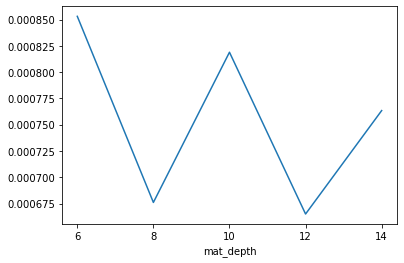

In [55]:
import matplotlib.pyplot as plt
plt.plot(roc_auc_varianzas)
plt.xticks(np.arange(len(max_depths)), max_depths);
plt.xlabel('mat_depth')
plt.show()

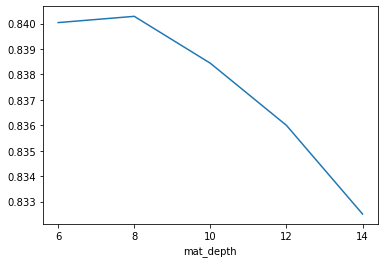

In [54]:
import matplotlib.pyplot as plt
plt.plot(roc_auc_estimados)
plt.xticks(np.arange(len(max_depths)), max_depths);
plt.xlabel('mat_depth')
plt.show()

In [62]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
from tqdm.notebook import tqdm 
max_depths = [6,8,10,12,14]
roc_auc_estimados = []
roc_auc_varianzas = []
for max_depth in tqdm(max_depths):
    folds = [train.index[t] for t, v in KFold(5).split(train)]
    test_probs = []
    train_probs = []
    fi = []
    for i, idx in enumerate(folds):
        print("*"*10, i, "*"*10)
        Xt = train.loc[idx]
        yt = y_train.loc[Xt.index]

        Xv = train.drop(Xt.index)
        yv = y_train.loc[Xv.index]

        learner = LGBMClassifier(n_estimators=1000, max_depth = max_depth )
        learner.fit(Xt, yt,  early_stopping_rounds=10, eval_metric="auc",
                    eval_set=[(Xt, yt), (Xv, yv)], verbose=50)
        test_probs.append(pd.Series(learner.predict_proba(test)[:, -1], index=test.index, name="fold_" + str(i)))
        train_probs.append(pd.Series(learner.predict_proba(Xv)[:, -1], index=Xv.index, name="probs"))
        fi.append(pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=Xt.columns))

    test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
    train_probs = pd.concat(train_probs)
    fi = pd.concat(fi, axis=1).mean(axis=1)
    print("*" * 21)
    print("roc auc estimado: ", roc_auc_score(y_train, train_probs.loc[y_train.index]))
    print("roc auc varianza: ", np.std([roc_auc_score(y_train.loc[folds[i]], train_probs.iloc[folds[i]]) for i in range(len(folds))]))
    roc_auc_estimados.append( roc_auc_score(y_train, train_probs.loc[y_train.index]) )
    roc_auc_varianzas.append( np.std([roc_auc_score(y_train.loc[folds[i]], train_probs.iloc[folds[i]]) for i in range(len(folds))]) )
    

********** 0 **********


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.835126	training's binary_logloss: 0.307475	valid_1's auc: 0.827729	valid_1's binary_logloss: 0.313076
[100]	training's auc: 0.847708	training's binary_logloss: 0.297815	valid_1's auc: 0.835096	valid_1's binary_logloss: 0.307554
[150]	training's auc: 0.855785	training's binary_logloss: 0.291665	valid_1's auc: 0.838189	valid_1's binary_logloss: 0.305418
[200]	training's auc: 0.861235	training's binary_logloss: 0.287241	valid_1's auc: 0.839325	valid_1's binary_logloss: 0.304483
[250]	training's auc: 0.867089	training's binary_logloss: 0.282793	valid_1's auc: 0.840638	valid_1's binary_logloss: 0.303717
Early stopping, best iteration is:
[265]	training's auc: 0.868477	training's binary_logloss: 0.281652	valid_1's auc: 0.840882	valid_1's binary_logloss: 0.303539
********** 1 **********
Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.835708	training's binary_logloss: 0.30733

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.837812	training's binary_logloss: 0.305836	valid_1's auc: 0.829806	valid_1's binary_logloss: 0.311891
[100]	training's auc: 0.850445	training's binary_logloss: 0.296097	valid_1's auc: 0.836553	valid_1's binary_logloss: 0.306726
[150]	training's auc: 0.858258	training's binary_logloss: 0.289984	valid_1's auc: 0.838286	valid_1's binary_logloss: 0.305385
[200]	training's auc: 0.865257	training's binary_logloss: 0.284787	valid_1's auc: 0.839281	valid_1's binary_logloss: 0.304687
[250]	training's auc: 0.872022	training's binary_logloss: 0.279963	valid_1's auc: 0.840284	valid_1's binary_logloss: 0.304012
Early stopping, best iteration is:
[249]	training's auc: 0.871908	training's binary_logloss: 0.280041	valid_1's auc: 0.840269	valid_1's binary_logloss: 0.304012
********** 1 **********
Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.837663	training's binary_logloss: 0.30593

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.838477	training's binary_logloss: 0.305434	valid_1's auc: 0.830731	valid_1's binary_logloss: 0.311379
[100]	training's auc: 0.851241	training's binary_logloss: 0.295575	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.306051
[150]	training's auc: 0.859909	training's binary_logloss: 0.289422	valid_1's auc: 0.839112	valid_1's binary_logloss: 0.304977
[200]	training's auc: 0.867202	training's binary_logloss: 0.284066	valid_1's auc: 0.84016	valid_1's binary_logloss: 0.304334
Early stopping, best iteration is:
[231]	training's auc: 0.871568	training's binary_logloss: 0.281043	valid_1's auc: 0.840568	valid_1's binary_logloss: 0.304047
********** 1 **********
Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.838061	training's binary_logloss: 0.305739	valid_1's auc: 0.830654	valid_1's binary_logloss: 0.311194
[100]	training's auc: 0.85098	training's binary_logloss: 0.295878	

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.83854	training's binary_logloss: 0.305428	valid_1's auc: 0.83041	valid_1's binary_logloss: 0.311505
[100]	training's auc: 0.851495	training's binary_logloss: 0.29546	valid_1's auc: 0.837364	valid_1's binary_logloss: 0.306258
[150]	training's auc: 0.860384	training's binary_logloss: 0.289207	valid_1's auc: 0.838744	valid_1's binary_logloss: 0.305176
[200]	training's auc: 0.867857	training's binary_logloss: 0.283903	valid_1's auc: 0.839598	valid_1's binary_logloss: 0.304552
Early stopping, best iteration is:
[202]	training's auc: 0.868131	training's binary_logloss: 0.283692	valid_1's auc: 0.839691	valid_1's binary_logloss: 0.304497
********** 1 **********
Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.838708	training's binary_logloss: 0.305311	valid_1's auc: 0.83124	valid_1's binary_logloss: 0.310825
[100]	training's auc: 0.851592	training's binary_logloss: 0.295497	va

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.838756	training's binary_logloss: 0.305279	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.311308
[100]	training's auc: 0.851853	training's binary_logloss: 0.295248	valid_1's auc: 0.838045	valid_1's binary_logloss: 0.305915
[150]	training's auc: 0.860269	training's binary_logloss: 0.288978	valid_1's auc: 0.839411	valid_1's binary_logloss: 0.304832
[200]	training's auc: 0.868161	training's binary_logloss: 0.283543	valid_1's auc: 0.840363	valid_1's binary_logloss: 0.304234
Early stopping, best iteration is:
[218]	training's auc: 0.870497	training's binary_logloss: 0.281697	valid_1's auc: 0.840541	valid_1's binary_logloss: 0.304047
********** 1 **********
Training until validation scores don't improve for 10 rounds
[50]	training's auc: 0.83846	training's binary_logloss: 0.305371	valid_1's auc: 0.831036	valid_1's binary_logloss: 0.310872
[100]	training's auc: 0.851659	training's binary_logloss: 0.295435

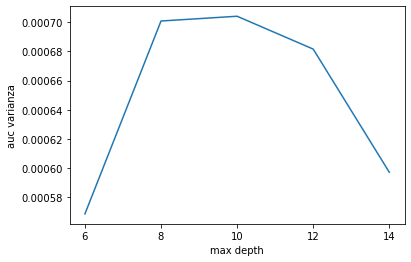

In [64]:
import matplotlib.pyplot as plt
plt.plot(roc_auc_varianzas)
plt.xticks(np.arange(len(max_depths)), max_depths);
plt.xlabel('max depth')
plt.ylabel('auc varianza')
plt.show()

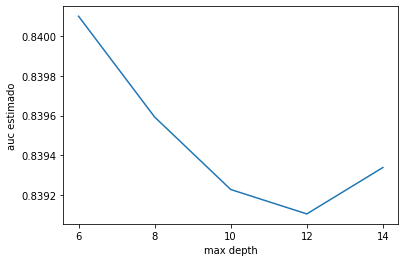

In [65]:
import matplotlib.pyplot as plt
plt.plot(roc_auc_estimados)
plt.xticks(np.arange(len(max_depths)), max_depths);
plt.xlabel('max depth')
plt.ylabel('auc estimado')
plt.show()

In [ ]:
# roc auc estimado:  0.860778375567941  # roc auc estimado:  0.8287296558597061 benchmark

# roc auc estimado:  0.8235666881996343 solo considerando rcc, inputando datos categoricos. con 4 mes
# roc auc varianza:  0.0005453571957666847

# roc auc estimado:  0.8236751116856392 solo considerando rcc, inputando datos categoricos. con 6 mes
# roc auc varianza:  0.0007266775450365375

# roc auc estimado:  0.8240426706542976 solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0006480438484228306

# roc auc estimado:  0.8358995025496325   solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.000799546878111712  y incluyendo se sin imputar datos

# roc auc estimado:  0.8362318848230975    solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0006670589830583723 y incluyendo la base se imputando edad y cod_ubi

# roc auc estimado:  0.8357779560666587  solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0008281941487650447 y incluyendo la base se imputando edad y cod_ubi. y en base final 

# roc auc estimado:  0.8386997825126665  solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0007378701891037694 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding

# roc auc estimado:  0.8390378213410135 solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0007879483415566218 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding. Impuntando la base final
#### 0.83049 es el score en el leaderboard

# roc auc estimado:  0.860778375567941 solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0007522563589463705 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding. 
#                                         Add censo sin imputar datos
#### Hay un sobreajuste de los datos (0.81290)

# roc auc estimado:  0.8601038804961594 solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0007408029176933889 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding. 
#                                         Add censo. Inputando datos en la base final 
####  Hay un sobreajuste de los datos (0.81335)

# roc auc estimado:  0.8403745150148406 solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0007145134831505686 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding.
#                                         Add sunat, sin imputar datos 
#### 0.83169 es el score en el leaderboard

# roc auc estimado:  0.8404409620195707 solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0007187836690898979 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding.
#                                         Add sunat, imputando datos en la base final

# roc auc estimado:  0.8424448270443908 solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  0.0006541668625712339 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding.
#                                         Add sunat con Mean Encoding. Inputando en la base final
#### 0.82922 es el score en el leaderboard

# roc auc estimado:  0.8400602964442501 solo considerando rcc, inputando datos categoricos. con 12 mes. Mean_encoding
# roc auc varianza:  0.0007915113545841123 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding.
#                                         Add sunat, sin imputar datos 

# roc auc estimado:  0.8404655548713938 solo considerando rcc, inputando datos categoricos. con 12 mes. Mean_encoding
# roc auc varianza:  0.0007525289304731753 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding.
#                                         Add sunat, sin imputar datos y eliminando COD_CLASIFICACION_DEUDOR_sum_ult2mes

# roc auc estimado:  0.835370939961718 solo considerando rcc, inputando datos categoricos. con 12 mes. Mean_encoding
# roc auc varianza:  0.0007997947306923314 y incluyendo la base se imputando edad y cod_ubi con Mean Encoding.
#                                         Add sunat, sin imputar datos y eliminando COD_CLASIFICACION_DEUDOR_sum_ult2mes
#                                          eliminando variables correlacionadas con 211 variables

# roc auc estimado:  **************** solo considerando rcc, inputando datos categoricos. con 6 mes. Mean_encoding
# roc auc varianza:  **************** y incluyendo la base se imputando edad y cod_ubi con Mean Encoding.
#                                         Add sunat, sin imputar datos. Con modelo ensamblado de CatBoost y LightGBM
#### 0.83292 score en el leaderboard

In [ ]:
# fi.sort_values(ascending=False).head(50)

# dto_me                                            0.053591
# COD_CLASIFICACION_DEUDOR_sum_ult1mes              0.038489
# COD_CLASIFICACION_DEUDOR_max_ult1mes              0.026788
# cod_instit_financiera_mode_ult1mes_me             0.024168
# COD_CLASIFICACION_DEUDOR_0_saldo_ult1meses        0.023845
# zon_sis                                           0.021759
# tipo_credito_12_saldo_ult1meses                   0.021530
# RIESGO_DIRECTO_1_saldo_ult1meses                  0.020410

In [74]:
from catboost import CatBoostClassifier
learner_ = CatBoostClassifier(n_estimators=1000, eval_metric = 'AUC', max_depth = 6)
learner_.fit(train, y_train,  early_stopping_rounds=10, verbose = 50)

Learning rate set to 0.126968
0:	total: 307ms	remaining: 5m 6s
50:	total: 17.2s	remaining: 5m 19s
100:	total: 32s	remaining: 4m 44s
150:	total: 47s	remaining: 4m 24s
200:	total: 1m 2s	remaining: 4m 6s
250:	total: 1m 17s	remaining: 3m 49s
300:	total: 1m 31s	remaining: 3m 33s
350:	total: 1m 46s	remaining: 3m 16s
400:	total: 2m 1s	remaining: 3m 1s
450:	total: 2m 16s	remaining: 2m 46s
500:	total: 2m 31s	remaining: 2m 30s
550:	total: 2m 45s	remaining: 2m 14s
600:	total: 2m 59s	remaining: 1m 59s
650:	total: 3m 15s	remaining: 1m 44s
700:	total: 3m 30s	remaining: 1m 29s
750:	total: 3m 44s	remaining: 1m 14s
800:	total: 4m	remaining: 59.7s
850:	total: 4m 16s	remaining: 44.8s
900:	total: 4m 30s	remaining: 29.7s
950:	total: 4m 45s	remaining: 14.7s
999:	total: 4m 59s	remaining: 0us


In [75]:
from lightgbm import LGBMClassifier
learner2 = LGBMClassifier(n_estimators=1000, max_depth=6)
learner2.fit(train, y_train, eval_metric="auc", verbose=50)

LGBMClassifier(max_depth=6, n_estimators=1000)

In [76]:
test_probs_ = pd.Series(learner_.predict_proba(test)[:, -1], index=test.index, name="target")
test_probs2 = pd.Series(learner2.predict_proba(test)[:, -1], index=test.index, name="target")
test_probs_mean = test_probs_*0.5 + test_probs2*0.5
test_probs_mean.name = 'target'

In [77]:
test_probs_mean.name = "target"
test_probs_mean.to_csv("test24.csv")

<a href = 'test24.csv'>Download csv</a>

In [ ]:
#### final

In [56]:
learner_ = CatBoostClassifier(n_estimators=1000, eval_metric = 'AUC', max_depth = 8)
learner_.fit(train, y_train,  early_stopping_rounds=10, verbose = 50)

Learning rate set to 0.126968
0:	total: 592ms	remaining: 9m 51s
50:	total: 23.4s	remaining: 7m 14s
100:	total: 44.9s	remaining: 6m 39s
150:	total: 1m 5s	remaining: 6m 9s
200:	total: 1m 25s	remaining: 5m 40s
250:	total: 1m 45s	remaining: 5m 15s
300:	total: 2m 7s	remaining: 4m 56s
350:	total: 2m 28s	remaining: 4m 33s
400:	total: 2m 48s	remaining: 4m 11s
450:	total: 3m 9s	remaining: 3m 50s
500:	total: 3m 30s	remaining: 3m 29s
550:	total: 3m 50s	remaining: 3m 7s
600:	total: 4m 11s	remaining: 2m 47s
650:	total: 4m 32s	remaining: 2m 26s
700:	total: 4m 53s	remaining: 2m 5s
750:	total: 5m 14s	remaining: 1m 44s
800:	total: 5m 35s	remaining: 1m 23s
850:	total: 5m 55s	remaining: 1m 2s
900:	total: 6m 17s	remaining: 41.4s
950:	total: 6m 38s	remaining: 20.5s
999:	total: 6m 59s	remaining: 0us


In [57]:
fi_ = pd.Series(learner_.feature_importances_ / learner_.feature_importances_.sum(), index=train.columns)
fi_.sort_values(ascending=False).head(50)

dto_me                                         0.046629
COD_CLASIFICACION_DEUDOR_sum_ult1mes           0.029084
edad                                           0.026830
RIESGO_DIRECTO_1_saldo_ult1meses               0.024089
tipo_credito_12_saldo_ult1meses                0.023270
tip_lvledu_me                                  0.021432
cod_instit_financiera_mode_ult1mes_me          0.021363
tipo_credito_11_saldo_ult12meses               0.019710
cod_instit_financiera_mode_ult12mes_me         0.019689
tipo_credito_11_saldo_ult1meses                0.019544
RIESGO_DIRECTO_-1_saldo_ult12meses             0.018514
RIESGO_DIRECTO_1_saldo_ult12meses              0.018318
cod_ubi                                        0.017765
COD_CLASIFICACION_DEUDOR_0_saldo_ult1meses     0.017581
saldo_max_ult12mes                             0.016781
cod_instit_financiera_mode_ult2mes_me          0.015906
COD_CLASIFICACION_DEUDOR_0_saldo_ult12meses    0.012202
saldo_max_ult1mes                              0

In [58]:
test_probs_ = pd.Series(learner_.predict_proba(test)[:, -1], index=test.index, name="target")
test_probs_.shape

(396666,)

In [61]:
test_probs_.name = "target"
test_probs_.to_csv("test22.csv")

<a href=test22.csv>Download csv</a>